In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def processing(path):

    df_avc = pd.read_csv(path)
    df_avc.drop('Unnamed: 0',1,inplace=True)
    
    df2 = df_avc[['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke']]
    df2 = df_avc
    df_avc.columns = ['Id','Genre','Age', 'Hypertension', 'Maladie_cardiaque', 'Deja_marie', 'Type_job', 'Zone_residence', 'Glycemie', 'IMC', 'Fumeur', 'AVC']

    #Remplacement des valeurs en chaine de caractères en int

    #Homme = 0, Femme = 1, Autre = 2
    df_avc.Genre = df_avc.Genre.replace('Male', 0)
    df_avc.Genre = df_avc.Genre.replace('Female', 1)
    df_avc.Genre = df_avc.Genre.replace('Other', 2)

    #Déjà marié : 0 => non; 1=> oui
    df_avc.Deja_marie = df_avc.Deja_marie.replace('No', 0)
    df_avc.Deja_marie = df_avc.Deja_marie.replace('Yes', 1)

    #Type de travail : Secteur privé (0), Secteur public (1),
    # Auto-entrepreneur (2), enfant (3), jamais travaillé (4)
    df_avc.Type_job = df_avc.Type_job.replace('Private', 0)
    df_avc.Type_job = df_avc.Type_job.replace('Govt_job', 1)
    df_avc.Type_job = df_avc.Type_job.replace('Self-employed', 2)
    df_avc.Type_job = df_avc.Type_job.replace('children', 3)
    df_avc.Type_job = df_avc.Type_job.replace('Never_worked', 4)

    #Zone résidentielle : Urbain (0), Rural (2)
    df_avc.Zone_residence = df_avc.Zone_residence.replace('Urban', 0)
    df_avc.Zone_residence = df_avc.Zone_residence.replace('Rural', 1)

    #Fumeur : Jamais fumé (0), Ancien fumeur (1), Fumeur (2), inconnu (3)
    df_avc.Fumeur = df_avc.Fumeur.replace('never smoked', 0)
    df_avc.Fumeur = df_avc.Fumeur.replace('formerly smoked', 1)
    df_avc.Fumeur = df_avc.Fumeur.replace('smokes', 2)
    df_avc.Fumeur = df_avc.Fumeur.replace('Unknown', 3)
    
    #remplacement des nan par la moyenne de la colonne
    #df_avc['IMC'].fillna((df_avc['IMC'].mean()), inplace=True)
    
    # OU suppression des nan
    df_avc = df_avc.dropna()
    
    #sépération Train/Test
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_avc[['Genre', 'Age', 'Hypertension', 'Maladie_cardiaque', 'Deja_marie', 'Type_job', 'Zone_residence', 'Glycemie', 'IMC', 'Fumeur']], df_avc['AVC'], test_size=0.20, random_state=42)
    #print(df_avc)
    #print(Xtrain)
    #print(Ytrain)
    #print(Xtest)
    #print(Ytest)
    return df_avc, Xtrain, Xtest, Ytrain, Ytest

In [3]:
df_avc, Xtrain, Xtest, Ytrain, Ytest=processing("healthcare-dataset-stroke-data-1.csv")
print(df_avc)

         Id  Genre   Age  Hypertension  Maladie_cardiaque  Deja_marie  \
0      9046      0  67.0             0                  1           1   
2     31112      0  80.0             0                  1           1   
3     60182      1  49.0             0                  0           1   
4      1665      1  79.0             1                  0           1   
5     56669      0  81.0             0                  0           1   
6     53882      0  74.0             1                  1           1   
7     10434      1  69.0             0                  0           0   
9     60491      1  78.0             0                  0           1   
10    12109      1  81.0             1                  0           1   
11    12095      1  61.0             0                  1           1   
12    12175      1  54.0             0                  0           1   
14     5317      1  79.0             0                  1           1   
15    58202      1  50.0             1             

In [4]:
df_avc.corr()

,Id,Genre,Age,Hypertension,Maladie_cardiaque,Deja_marie,Type_job,Zone_residence,Glycemie,IMC,Fumeur,AVC
Id,1.000000,0.002004,-0.205149,-0.117431,-0.106819,-0.087550,0.015000,0.001817,-0.182486,-0.100681,0.041227,-0.486952
Genre,0.002004,1.000000,0.016944,-0.008063,-0.101059,0.020528,-0.046630,-0.004265,-0.071353,0.014403,-0.090930,-0.013404
Age,-0.205149,0.016944,1.000000,0.293753,0.276473,0.653432,-0.317046,-0.014303,0.312607,0.331293,-0.310227,0.433374
Hypertension,-0.117431,-0.008063,0.293753,1.000000,0.112152,0.149050,-0.026951,-0.000070,0.219656,0.174204,-0.143549,0.241794
Maladie_cardiaque,-0.106819,-0.101059,0.276473,0.112152,1.000000,0.120624,-0.055798,-0.001019,0.230403,0.070283,-0.024985,0.223841
Deja_marie,-0.087550,0.020528,0.653432,0.149050,0.120624,1.000000,-0.333817,0.005832,0.195779,0.337835,-0.237122,0.206200
Type_job,0.015000,-0.046630,-0.317046,-0.026951,-0.055798,-0.333817,1.000000,-0.010847,-0.074878,-0.325414,0.262777,-0.078725
Zone_residence,0.001817,-0.004265,-0.014303,-0.000070,-0.001019,0.005832,-0.010847,1.000000,-0.003313,-0.008873,-0.010039,-0.011525
Glycemie,-0.182486,-0.071353,0.312607,0.219656,0.230403,0.195779,-0.074878,-0.003313,1.000000,0.248201,-0.098859,0.347159
IMC,-0.100681,0.014403,0.331293,0.174204,0.070283,0.337835,-0.325414,-0.008873,0.248201,1.000000,-0.207346,0.180561


In [5]:
#fonction trouvé sur sklearn pour afficher le learning rate
print(__doc__)

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()

    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')

    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')

    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

Automatically created module for IPython interactive environment


# Choix du modele
#### Nos données sont labelisés donc on va tester des algos d'apprentissage supervisé

on commence par le perceptron, pour tester l'algo le plus "basique" meme si on sait que ca ne sera pas le meilleur

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
perceptron=Perceptron(n_jobs=-1)

parameters = {'penalty':('l2','l1','elasticnet',None),
              'max_iter':(100,500,1000,2000,5000),
              'tol':(1e-3,1e-4,1e-5),
              'eta0':(1,0.1,0.01)
             }

clf = GridSearchCV(perceptron, parameters,refit=True)

clf.fit(Xtrain, Ytrain)
print(clf.score(Xtest,Ytest))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8224543080939948


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=-1, penalty='l2', random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)


TypeError: learning_curve() got an unexpected keyword argument 'return_times'

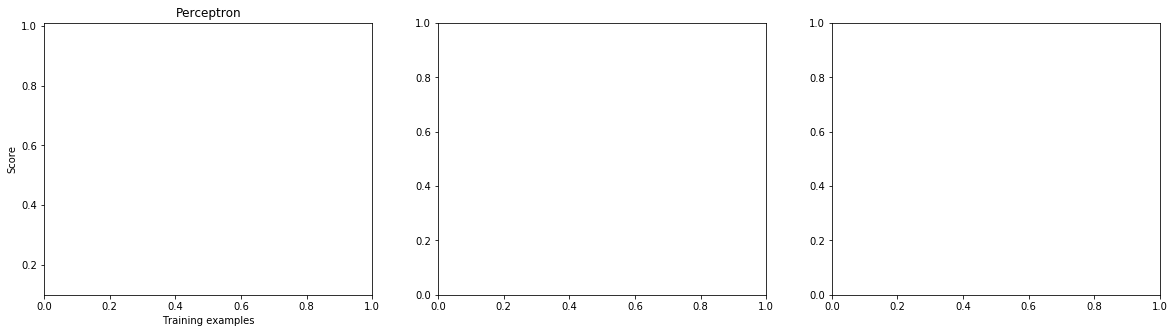

In [7]:
title = "Perceptron"
# SVC is more expensive so we do a lower number of CV iterations:
print(clf.best_estimator_)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(clf.best_estimator_, title, Xtrain, Ytrain, ylim=(0.1, 1.01),
                    cv=None, n_jobs=4)
metrics.plot_roc_curve(clf.best_estimator_, Xtest, Ytest) 

70% de reussite et une courbe ROC qui n'est pas si mauvaise pour un premier resultat, testons d autres algo pour faire mieux

### on va tester les differents modeles pour Naive Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

parameters1 = {'alpha':(1,0.1,0),
              'fit_prior':(True,False)
             }

parameters2 = {'var_smoothing':(1e-9,1e-8,1e-10)
             }


MNB=GridSearchCV(MultinomialNB(), parameters1,refit=True)
GNB=GridSearchCV(GaussianNB(), parameters2,refit=True)
BNB=GridSearchCV(BernoulliNB(), parameters1,refit=True)

MNB.fit(Xtrain,Ytrain)
GNB.fit(Xtrain,Ytrain)
BNB.fit(Xtrain,Ytrain)

m=MNB.score(Xtest,Ytest)
g=GNB.score(Xtest,Ytest)
b=BNB.score(Xtest,Ytest)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting al

In [9]:
print(m)
print(g)
print(b)

0.7798085291557877
0.8102697998259356
0.8285465622280244


MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)


TypeError: learning_curve() got an unexpected keyword argument 'return_times'

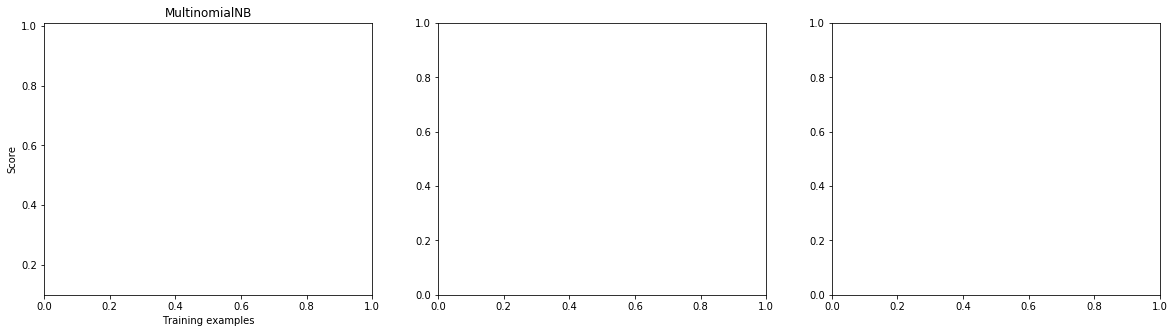

In [10]:
title = "MultinomialNB"
# SVC is more expensive so we do a lower number of CV iterations:
print(MNB.best_estimator_)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(clf.best_estimator_, title, Xtrain, Ytrain, ylim=(0.1, 1.01),
                    cv=cv, n_jobs=4)

title = "GaussianNB"
# SVC is more expensive so we do a lower number of CV iterations:
print(GNB.best_estimator_)
plot_learning_curve(GNB.best_estimator_, title, Xtrain, Ytrain, ylim=(0.1, 1.01),
                    cv=cv, n_jobs=4)

title = "BernoulliNB"
# SVC is more expensive so we do a lower number of CV iterations:
print(BNB.best_estimator_)
plot_learning_curve(clf.best_estimator_, title, Xtrain, Ytrain, ylim=(0.1, 1.01),
                    cv=cv, n_jobs=4)

In [11]:
metrics.plot_roc_curve(MNB.best_estimator_, Xtest, Ytest)
metrics.plot_roc_curve(GNB.best_estimator_, Xtest, Ytest) 
metrics.plot_roc_curve(BNB.best_estimator_, Xtest, Ytest) 

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

Les scores sont meilleurs que le perceptron, mais quand on compare les courbes Roc des trois modele il parait beaucoup plus interessant de choisir le modele Gaussien pour Naive Bayes meme avec un taux de reussite legerement plus faible que celui de bernoulli il a une courbe Roc bien meilleur.

### on teste le MLP
##### le perceptron n'etais pas si mauvais donc on va essayer le mlp

In [12]:
#cette case sert juste a ne pas avoir a réexecuter tous le code de la recherche de parametre pour MLP qui est excessivement long
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(activation='tanh', max_iter=2000, tol=1e-05)
mlp.fit(Xtrain, Ytrain)
print(mlp.score(Xtest,Ytest))

0.8781549173194082


In [ ]:
from sklearn.neural_network import MLPClassifier


mlp=MLPClassifier(max_iter=2000)

parameters = {'activation':('identity', 'logistic', 'tanh', 'relu'),
              'solver':('sgd', 'adam'),
              'alpha':(0.0001,0.001,0.00001),
              'learning_rate':('constant', 'invscaling', 'adaptive'),
              #'power_t':(0.1, 0.5,0.75,1),
              #'max_iter':(1000,2000),
              'tol':(1e-3, 1e-4, 1e-5),
              #'momentum':(0.9, 0.8, 0.7,0.6,0.5,0),
              #'beta_1':(0.9, 0.8, 0.7,0.6,0.5),
              #'beta_2':(0.999, 0.990, 0.9),
              #'epsilon':(1e-8,1e-9,1e-7,1e-10,1e-6)
             }

MLP = GridSearchCV(mlp, parameters,refit=True)

MLP.fit(Xtrain, Ytrain)
print(MLP.score(Xtest,Ytest))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/opt/anaconda3/lib/python3.

In [ ]:
print(MLP.best_estimator_)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(MLP.best_estimator_, title, Xtrain, Ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

metrics.plot_roc_curve(MLP.best_estimator_, Xtest, Ytest) 

### On teste le KNN
##### on va voir si le knn peut former des groupes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':(3,4,5,6,7),
              'weights':('uniform', 'distance'),
              'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size':(20, 30, 40),
              'p':(1, 2,3,)
             }

neigh = GridSearchCV(KNeighborsClassifier(n_jobs=-1), parameters,refit=True)
neigh.fit(Xtrain, Ytrain)
n=neigh.score(Xtest,Ytest)

In [ ]:
print(n)

In [ ]:
title = "KNN"
# SVC is more expensive so we do a lower number of CV iterations:
print(neigh.best_estimator_)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(neigh.best_estimator_, title, Xtrain, Ytrain, ylim=(0.7, 1.01),
                    cv=None, n_jobs=4)
#MLPClassifier(activation='tanh', learning_rate='adaptive', max_iter=2000)
metrics.plot_roc_curve(neigh.best_estimator_, Xtest, Ytest) 

86% de reussite avec une bonne courbe ROC, il a un score legerement meilleur que le mlp  avec une courbe roc Similaire.
Cependant pour les departager il faudrait plus de donnees pour voir si le training score et le cross validation score peuvent converger

### On teste RandomForest
##### le dernier algo qui pourrait etre meilleur que les autres

In [ ]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':(100,250,500),
              'criterion':('gini', 'entropy')
             }

rf= GridSearchCV(RandomForestClassifier(n_jobs=-1), parameters,refit=True)

rf.fit(Xtrain, Ytrain)
rf.score(Xtest,Ytest)

In [ ]:
title = "RandomForest"
print(rf.best_estimator_)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(rf.best_estimator_, title, Xtrain, Ytrain, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

metrics.plot_roc_curve(rf.best_estimator_, Xtest, Ytest) 

93% de reussite avec une courbe Roc Excellente.On peut meme supposer aux v ude la courbe d apprentissage qu'avec un jeu de donne plus grand on aurait un meilleur score

## Conclusion
On peut voir que random forest est le meilleur avec un score avec 93% donc c'est celui que l'on va garder pour predire les AVC
#### On crée la fonction de prediction
on met l'algo en parametre pour pouvoir le changer plus facilement si besoin

In [ ]:
def prediction(estimator,G:int, A:int, H:int, MC:int, DM:int, TJ:int, ZR:int, Gly:int, imc:int, F:int):
    data={'Genre':[G],'Age':[A],'Hypertension':[H],'Maladie_cardiaque':[MC],'Deja_marie':[DM],'Type_job':[TJ],'Zone_residence':[ZR],'Glycemie':[Gly],'IMC':[imc],'Fumeur':[F]}
    df = pd.DataFrame(data)
    return [estimator.predict(df),estimator.predict_proba(df)]

Un exemple de l utilisation de la fonction

In [ ]:
prediction(rf,G=1, A=49, H=0, MC=0, DM=1, TJ=0, ZR=0, Gly=171, imc=36, F=2)